In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tkinter as tk


In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

In [3]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'ST_Slope', 'RestingECG', 'ExerciseAngina'])


In [4]:
# Split the dataset into features and target variable
X = df.drop(columns=['HeartDisease']).values
y = df['HeartDisease'].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train an SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [8]:
# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [10]:
# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8532608695652174


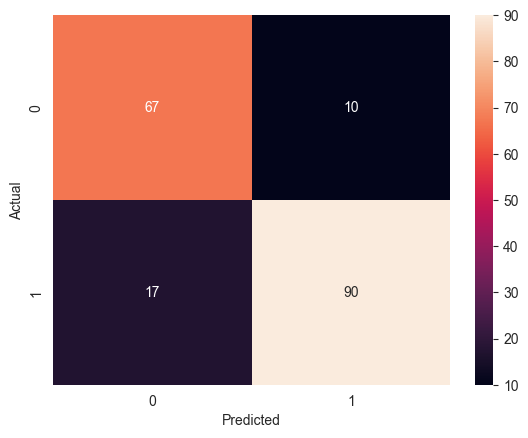

In [11]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:

# Generate a logistic classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [13]:
# Make predictions on the testing set using the SVM model
y_pred_svm = svm_model.predict(X_test)

In [14]:
# Evaluate the SVM model's accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', svm_accuracy)

SVM Accuracy: 0.8586956521739131


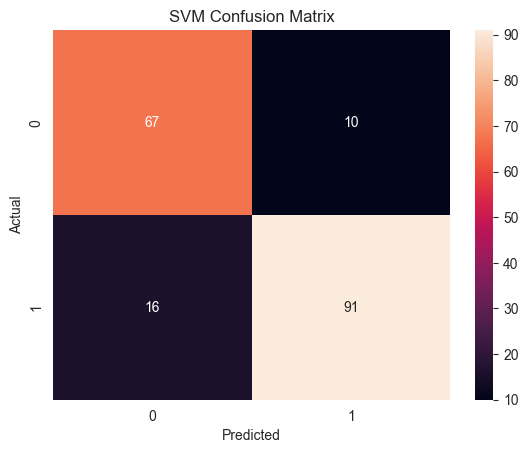

In [15]:
# Generate a confusion matrix for the SVM model
svm_cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [16]:
# Generate a classification report for the SVM model
svm_report = classification_report(y_test, y_pred_svm)
print('SVM Classification Report:')
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



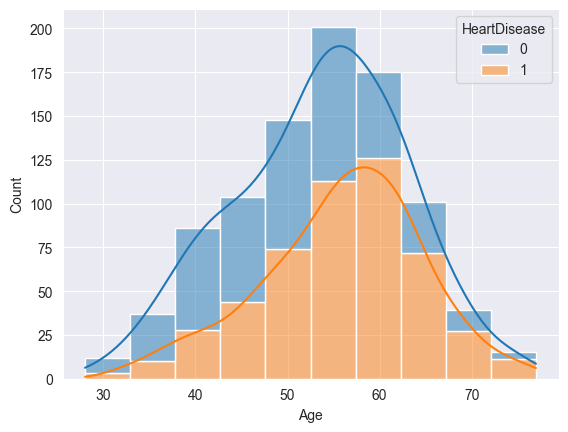

In [17]:
# Visualize the distribution of ages in the dataset
sns.histplot(df, x='Age', hue='HeartDisease', kde=True, multiple='stack', bins=10)
plt.show()

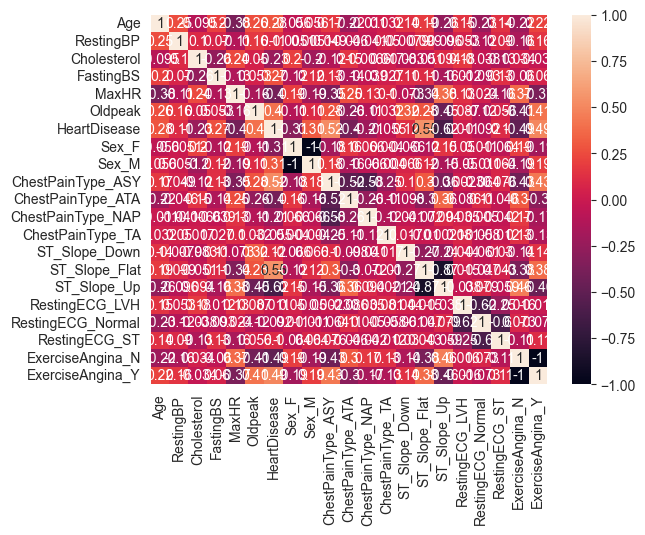

In [18]:
# Visualize the correlation between features
sns.heatmap(df.corr(), annot=True)
plt.show()